In [1]:
pip install pandas numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# --- Load Dataset ---
data_path = "/Users/praveenpuviindran/Downloads/KSV_gex.csv"  # Change to actual filename
df = pd.read_csv(data_path, index_col=0)  # Assumes first column contains gene names

In [4]:
# Display the first few rows
df.head()

,K1_133PP1.TRUE,K1_348PP1.TRUE,K1_622PP1.TRUE,K3_18883PP1.TRUE,K3_19081PP1.TRUE,K3_19577PP1.TRUE,Orf70_20979PP1.TRUE,K4_21778PP1.TRUE,K4_21778.5PP1.TRUE,K4_21780PP1.TRUE,...,K14_129773PP2.TRUE,K14_129773.5PP2.TRUE,K14_129945PP2.TRUE,K14_130126PP2.TRUE,K15_130749PP2.TRUE,K15_131117PP2.TRUE,K15_131117.5PP2.TRUE,K15_131458PP2.TRUE,K15_136250.5PP2.TRUE,K2_17821PP1.TRUE
180,-0.594482,-1.390993,-2.262487,-2.648898,3.897437,-3.448762,-2.356423,-1.046143,-2.885758,-4.333116,...,-13.697114,-0.740135,-2.421017,-7.719628,-0.306850,1.265098,-0.032917,0.983428,-6.201977,0.474952
220,-0.594482,-1.390993,-2.262487,-2.648898,17.166192,-3.448762,-2.356423,-1.685884,-2.885758,-4.333116,...,-13.697114,-0.740135,-1.132262,3.699127,-9.458095,-18.694643,-0.032917,-2.067818,-6.201977,-7.034789
225,0.590534,-0.205977,-1.077470,-1.463882,-4.877287,-2.263746,-1.171407,-0.500867,-1.700742,-3.148099,...,11.647903,0.444881,5.944259,9.695648,6.548426,9.150374,1.152099,7.728704,-5.016960,-5.849773
316,-0.594482,-1.390993,-2.262487,-2.648898,10.616899,5.370440,8.172779,7.523319,8.063444,9.916087,...,11.182089,-0.740135,1.838445,0.939834,2.912612,-8.465440,-0.032917,3.852890,-6.201977,8.304413
541,2.336119,-1.390993,-2.262487,-2.648898,1.868298,-3.448762,-2.356423,-1.685884,2.944843,-4.333116,...,-13.697114,-0.740135,-2.890156,1.491233,-0.005990,5.115958,-0.032917,-3.005712,-6.201977,3.635812


In [5]:
# Extract genome locations from gene names
gene_names = df.columns[1:]  # Excluding the first column
genome_locations = [float(name.split('_')[1].split('PP')[0]) for name in gene_names]

# Compute the pairwise distance matrix
distance_matrix = squareform(pdist(np.array(genome_locations).reshape(-1, 1)))

# Extract the lower triangle (excluding diagonal) and flatten
lower_triangle_indices = np.tril_indices_from(distance_matrix, k=-1)
gene_distances_vector = distance_matrix[lower_triangle_indices]

# Save the output
gene_distances_path = "/Users/praveenpuviindran/Downloads/gene_distances.csv"
pd.DataFrame(gene_distances_vector).to_csv(gene_distances_path, index=False, header=False)

gene_distances_path

'/Users/praveenpuviindran/Downloads/gene_distances.csv'

In [6]:
# Extract genome locations from gene names
gene_names = df.columns[1:]  # Excluding the first column
genome_locations = [float(name.split('_')[1].split('PP')[0]) for name in gene_names]

In [7]:
# Compute the pairwise distance matrix
distance_matrix = squareform(pdist(np.array(genome_locations).reshape(-1, 1)))

In [8]:
# Extract the lower triangle (excluding diagonal) and flatten
lower_triangle_indices = np.tril_indices_from(distance_matrix, k=-1)
gene_distances_vector = distance_matrix[lower_triangle_indices]

In [9]:
# Save the gene distances output
gene_distances_path = "/Users/praveenpuviindran/Downloads/gene_distances.csv"
pd.DataFrame(gene_distances_vector).to_csv(gene_distances_path, index=False, header=False)

In [10]:
# Extract expression data (excluding first column with gene identifiers)
expression_data = df.iloc[:, 1:]

In [11]:
# Compute Pearson and Spearman correlation matrices
pearson_corr_matrix = expression_data.corr(method="pearson")
spearman_corr_matrix = expression_data.corr(method="spearman")

In [12]:
# Function to extract lower triangle (excluding diagonal) and flatten
def extract_lower_triangle(corr_matrix):
    lower_triangle_indices = np.tril_indices_from(corr_matrix, k=-1)
    return corr_matrix.values[lower_triangle_indices]

In [13]:
# Flatten the lower triangle
pearson_lower_triangle = extract_lower_triangle(pearson_corr_matrix)
spearman_lower_triangle = extract_lower_triangle(spearman_corr_matrix)

In [14]:
# Save correlation results
pearson_corr_path = "/Users/praveenpuviindran/Downloads/gene_correlations_pearson.csv"
spearman_corr_path = "/Users/praveenpuviindran/Downloads/gene_correlations_spearman.csv"

pd.DataFrame(pearson_lower_triangle).to_csv(pearson_corr_path, index=False, header=False)
pd.DataFrame(spearman_lower_triangle).to_csv(spearman_corr_path, index=False, header=False)

# Output paths
pearson_corr_path, spearman_corr_path, gene_distances_path

('/Users/praveenpuviindran/Downloads/gene_correlations_pearson.csv',
 '/Users/praveenpuviindran/Downloads/gene_correlations_spearman.csv',
 '/Users/praveenpuviindran/Downloads/gene_distances.csv')

In [23]:
# Load the data
gene_distances = pd.read_csv("/Users/praveenpuviindran/Downloads/gene_distances.csv", header=None).squeeze()
pearson_corr = pd.read_csv("/Users/praveenpuviindran/Downloads/gene_correlations_pearson.csv", header=None).squeeze()
spearman_corr = pd.read_csv("/Users/praveenpuviindran/Downloads/gene_correlations_spearman.csv", header=None).squeeze()

In [24]:
gene_distances.head()

0      274.0
1    18535.0
2    18261.0
3    18733.0
4    18459.0
Name: 0, dtype: float64

In [25]:
pearson_corr.head()

0    0.407097
1    0.352955
2    0.024926
3    0.191772
4    0.144906
Name: 0, dtype: float64

In [26]:
spearman_corr.head()

0    0.730982
1    0.230418
2    0.081157
3    0.187113
4    0.158807
Name: 0, dtype: float64

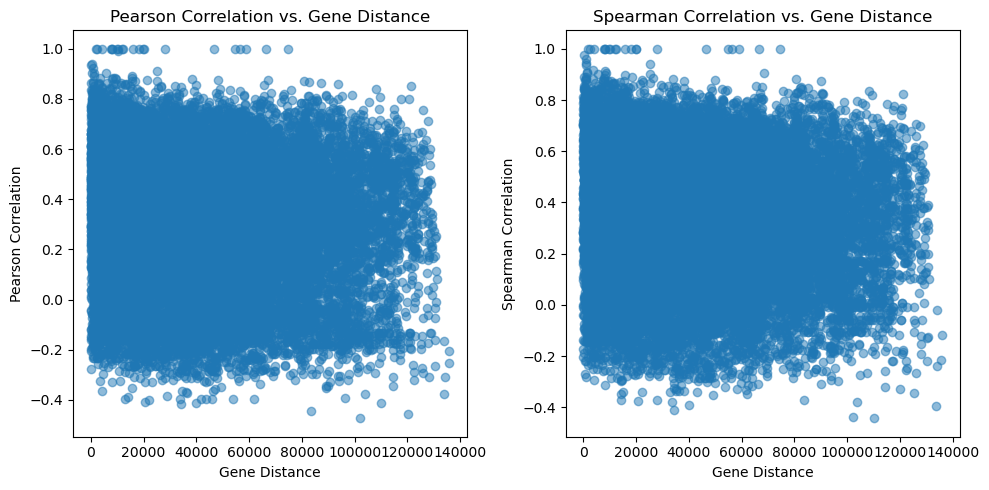

In [19]:
# Create scatter plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(gene_distances, pearson_corr, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Pearson Correlation")
plt.title("Pearson Correlation vs. Gene Distance")

plt.subplot(1, 2, 2)
plt.scatter(gene_distances, spearman_corr, alpha=0.5)
plt.xlabel("Gene Distance")
plt.ylabel("Spearman Correlation")
plt.title("Spearman Correlation vs. Gene Distance")

plt.tight_layout()
plt.show()

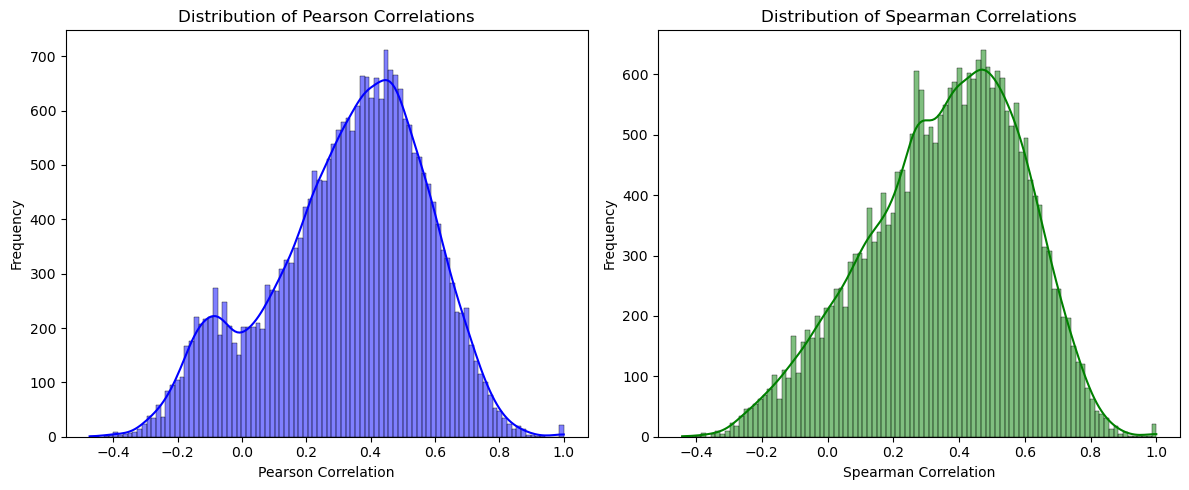

In [20]:
# Ensure data is numeric
pearson_corr = pd.to_numeric(pearson_corr, errors='coerce')
spearman_corr = pd.to_numeric(spearman_corr, errors='coerce')

# Plot histogram and density for both correlation methods
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(pearson_corr, bins=100, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Distribution of Pearson Correlations")
axes[0].set_xlabel("Pearson Correlation")
axes[0].set_ylabel("Frequency")

sns.histplot(spearman_corr, bins=100, kde=True, ax=axes[1], color='green')
axes[1].set_title("Distribution of Spearman Correlations")
axes[1].set_xlabel("Spearman Correlation")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

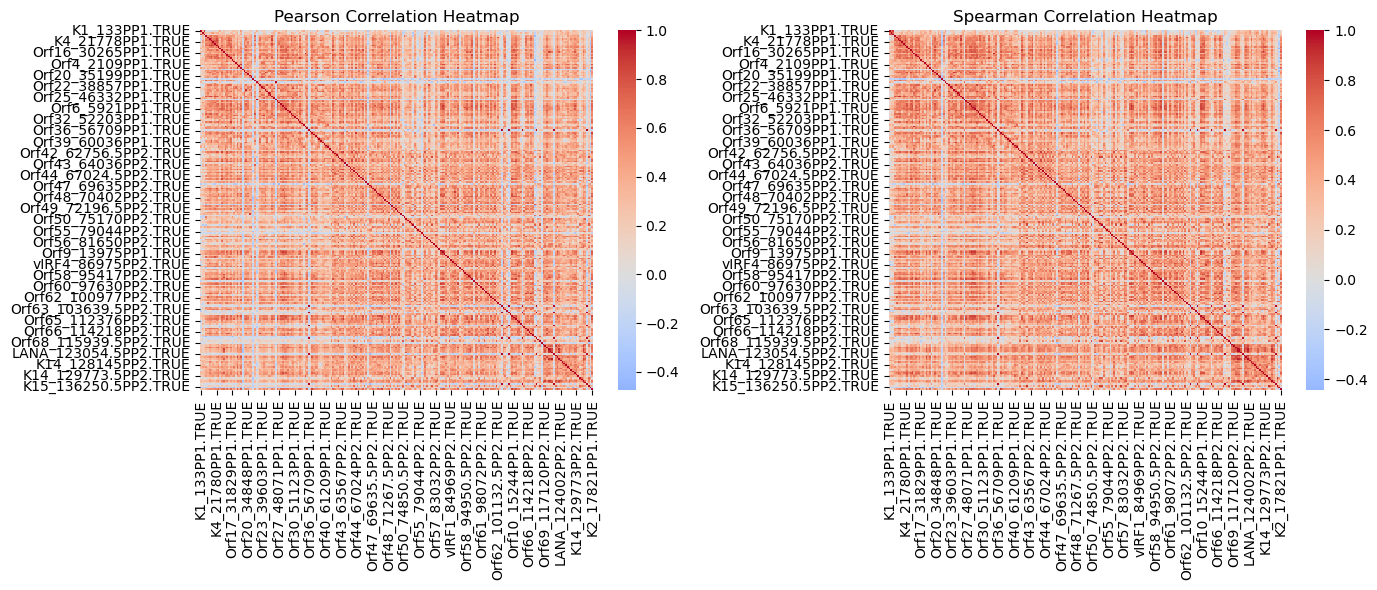

In [27]:
# Compute Pearson and Spearman correlation matrices
pearson_corr_matrix = df.corr(method="pearson")
spearman_corr_matrix = df.corr(method="spearman")

# Set up figure for heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson correlation heatmap
sns.heatmap(pearson_corr_matrix, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation Heatmap")

# Spearman correlation heatmap
sns.heatmap(spearman_corr_matrix, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Spearman Correlation Heatmap")

plt.tight_layout()
plt.show()

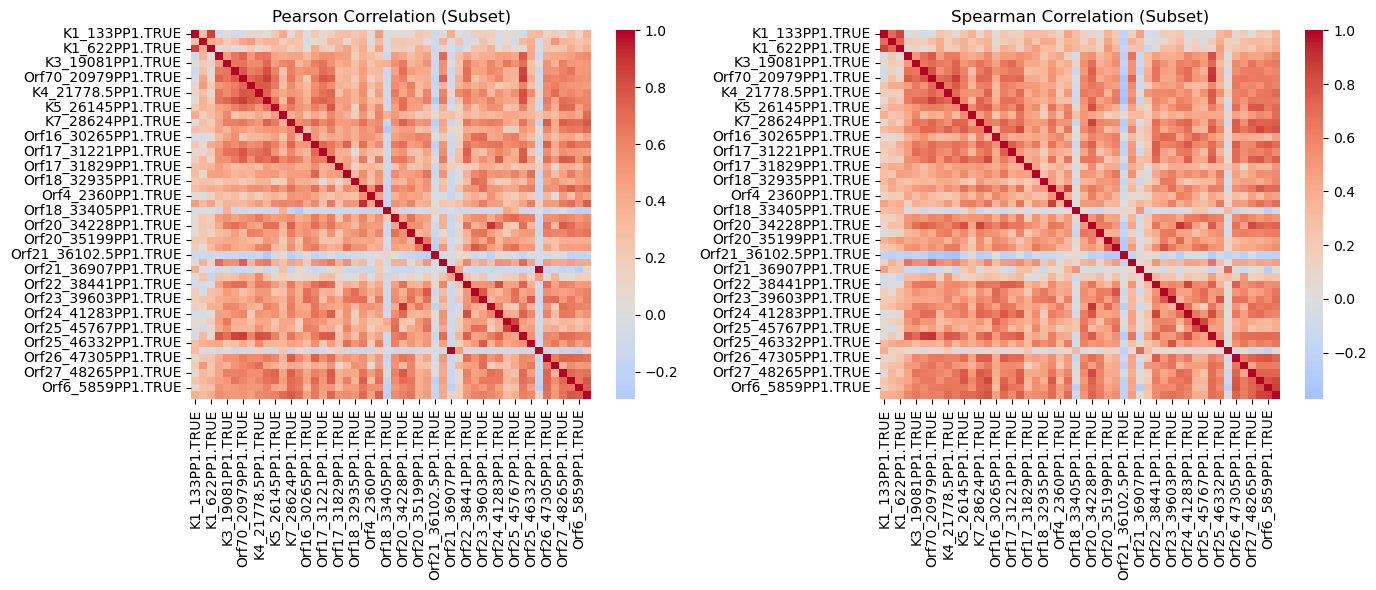

In [28]:
# Select a subset of genes (e.g., first 50 genes)
subset_genes = df.iloc[:, :50]  # Adjust the number as needed

# Compute Pearson and Spearman correlation matrices for the subset
pearson_corr_subset = subset_genes.corr(method="pearson")
spearman_corr_subset = subset_genes.corr(method="spearman")

# Set up figure for heatmaps
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pearson correlation heatmap
sns.heatmap(pearson_corr_subset, cmap="coolwarm", center=0, ax=axes[0])
axes[0].set_title("Pearson Correlation (Subset)")

# Spearman correlation heatmap
sns.heatmap(spearman_corr_subset, cmap="coolwarm", center=0, ax=axes[1])
axes[1].set_title("Spearman Correlation (Subset)")

plt.tight_layout()
plt.show()

In [30]:
# Compute Pearson and Spearman correlation matrices
pearson_corr_matrix = df.corr(method="pearson")
spearman_corr_matrix = df.corr(method="spearman")

# Save full correlation matrices as CSV files
pearson_corr_matrix.to_csv("/Users/praveenpuviindran/Downloads/pearson_correlation_matrix.csv")
spearman_corr_matrix.to_csv("/Users/praveenpuviindran/Downloads/spearman_correlation_matrix.csv")

# Display sample output (first 5 rows)
print("Pearson Correlation Matrix Sample:")
print(pearson_corr_matrix.head())

print("\nSpearman Correlation Matrix Sample:")
print(spearman_corr_matrix.head())

Pearson Correlation Matrix Sample:
                  K1_133PP1.TRUE  K1_348PP1.TRUE  K1_622PP1.TRUE  \
K1_133PP1.TRUE          1.000000        0.290987        0.855912   
K1_348PP1.TRUE          0.290987        1.000000        0.407097   
K1_622PP1.TRUE          0.855912        0.407097        1.000000   
K3_18883PP1.TRUE       -0.094408        0.352955        0.024926   
K3_19081PP1.TRUE        0.042717        0.191772        0.144906   

                  K3_18883PP1.TRUE  K3_19081PP1.TRUE  K3_19577PP1.TRUE  \
K1_133PP1.TRUE           -0.094408          0.042717         -0.101880   
K1_348PP1.TRUE            0.352955          0.191772          0.283921   
K1_622PP1.TRUE            0.024926          0.144906          0.008603   
K3_18883PP1.TRUE          1.000000          0.481583          0.649049   
K3_19081PP1.TRUE          0.481583          1.000000          0.659337   

                  Orf70_20979PP1.TRUE  K4_21778PP1.TRUE  K4_21778.5PP1.TRUE  \
K1_133PP1.TRUE              -0.0